<img src="https://cpb-us-e1.wpmucdn.com/blogs.ntu.edu.sg/dist/c/1998/files/2019/06/NTU_Logo_Colour_RGB_Positive.png" alt="logo" style="width: 400px;" align="left"/>
<img src="https://www.pinclipart.com/picdir/big/178-1781047_clip-arts-related-to-google-kaggle-png-download.png" style="width: 400px;" align="center" />

<h1> <u>EE0005: Introduction to Data Science and Artifical Intelligence - Mini Project</u></h1>
<h2>What's Cooking? </h2>

We have used a kaggle dataset called "What's cooking" (Ref: https://www.kaggle.com/c/whats-cooking/data) to do the following: 
1. Data exploration and visualization.
2. create a deep learning model **to classify a given receipe into different cuisines**. 


<font size="3.5">
    <br><b><u>Made by:</u></b>
    <br>Siddesh Sambasivam Suseela
    <br>Jain Shlok
</font>

-----

<font size="4"><b><u>Pre-requisites:</u></b></font>
<br><br><b><u>Libraries:</u></b>
<br><font size="2.5">**Data Handling:** Numpy, Pandas </font>
<br><font size="2.5">**Data Visulization:** seaborn, matplotlib </font>
<br><font size="2.5">**Deep learning framework:** Tensorflow </font>
<br><font size="2.5">**Misc:** sklearn </font>

<br><font size="2.5"><b><u>Dataset:</u></b> <a href="https://www.kaggle.com/c/whats-cooking/data">https://www.kaggle.com/c/whats-cooking/data</a> </font>

-----

<h3>Objective: Classify a given receipe to its respective cuisine </h3>
<br><u>Example:</u>
<br><center>receipe --> Cuisine</center>
<br><center>'romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles' --> greek </center>


<h2>Importing the dependencies</h2>

---

<img src="Images/pd.png" style="width: 400px;" align='left'>
<img src="Images/skl.png" style="width: 200px;" align='left'>
<img src="Images/tf.png" style="width: 300px;" align='left'>

---


In [1]:
import json
import io
import pandas as pd
import numpy as np
import seaborn as sb
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import KFold
sb.set()

/home/prodigy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/prodigy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/prodigy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/prodigy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

<h2>Installing the dependencies</h2>

In [2]:
# Checking the version of the tensorflow, as we will be using tensorflow2.0 for this project

print("Tensorflow Ver:\n")
print(tf.__version__)

Tensorflow Ver:

2.0.0-alpha0


In [ ]:
# If the above version is not 2.0, then run the following cell
!pip install --upgrade tensorflow

#Installing other dependencies
!pip install numpy
!pip install sklearn
!pip install tqdm
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/d3/59/d88fe8c58ffb66aca21d03c0e290cd68327cc133591130c674985e98a482/tensorflow-1.14.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/69/46/ebd21ce467ab87f2cf825413273936f9b1ee0e6cd4e2f2ee62e0516c771f/grpcio-1.25.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/05/d2/f94e68be6b17f46d2c353564da56e6fb89ef09faeeff3313a046cb810ca9/mock-3.0.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/49/ffa7ab9c52ec56b535cffec3bc844254c073888e6d4aeee464671ac97480/protobuf-3.10.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/00/83/b4a77d044e78ad1a45610eb88f745be2fd2c6d658f9798a15e384b7d57c9/wheel-0.33.6-py2.py3-none-any.whl
  Usi

In [ ]:
print("Tensorflow version: ",tf.__version__)

<h2>Loading the dataset from the JSON file</h2>

In [3]:
#Loading the training and test data

with open("Data/train.json") as f:
    raw_train_data = json.load(f)
    

In [4]:
#Converting the json file to dataframe

print("Datatype(TRAIN): ", type(raw_train_data))
raw_data_train_df = pd.DataFrame(raw_train_data)
print("Size of the training data= ", raw_data_train_df.shape)

print("\nNumber of records {}".format(len(raw_data_train_df.id)))

Datatype(TRAIN):  <class 'list'>
Size of the training data=  (39774, 3)

Number of records 39774


In [5]:
raw_data_train_df.head(10)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


<h2>Description of the dataset</h2>

---
<b>Columns:</b> 
<br>     Id 
<br> Cuisine 
<br>Ingredients 

Example of a node in the **train.json**:
<br>
{
  <br> <b>"id":</b> 24717,
  <br> <b>"cuisine":</b> "indian",
  <br> <b>"ingredients":</b> [
     "tumeric",
     "vegetable stock",
     "tomatoes",
     "garam masala",
     "naan",
     "red lentils",
     "red chili peppers",
     "onions",
     "spinach",
     "sweet potatoes"
 ]
 <br>}


<h2>Data exploration and visualization</h2>

In [6]:
#List of all the cuisines
cuisine = list(raw_data_train_df['cuisine'].unique())

#Indexing the cuisines for reference
index_label = dict()

for i,val in enumerate(cuisine):
    index_label.update({val:i})

raw_data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
id             39774 non-null int64
cuisine        39774 non-null object
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [7]:
print("\nClass labels with average number of samples:\n-------------\n")
#Prints the count of values in each cuisine
print(raw_data_train_df.cuisine.value_counts(normalize=True))

#Basic exploration
print("\nNumber of classes= ", len(raw_data_train_df['cuisine'].unique()))
print("\nNumber of unique ingredients {}\n".format(len(set([ingredient for ingredient_list in raw_data_train_df.ingredients.values for ingredient in ingredient_list]))))


Class labels with average number of samples:
-------------

italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64

Number of classes=  20

Number of unique ingredients 6714



In [8]:
class_average = [0]*20
cus_vis = dict()
print("\nAverage size of the receipe in each cuisine:\n")
for cus in cuisine:
    avg_size = 0
    tmp = raw_data_train_df[raw_data_train_df['cuisine']==cus]
    for val in tmp['ingredients']:
        avg_size+=len(val)
    class_average[index_label[cus]]= avg_size/len(tmp)
    print(f"{cus}= ", round(class_average[index_label[cus]],4))
    cus_vis.update({cus:avg_size/len(tmp)})


Average size of the receipe in each cuisine:

greek=  10.1821
southern_us=  9.635
filipino=  10.0
indian=  12.706
jamaican=  12.2148
spanish=  10.4237
italian=  9.909
mexican=  10.8774
chinese=  11.9828
british=  9.709
thai=  12.5458
vietnamese=  12.6752
cajun_creole=  12.6171
brazilian=  9.5203
french=  9.8178
japanese=  9.7351
irish=  9.2999
korean=  11.2843
moroccan=  12.9099
russian=  10.2249


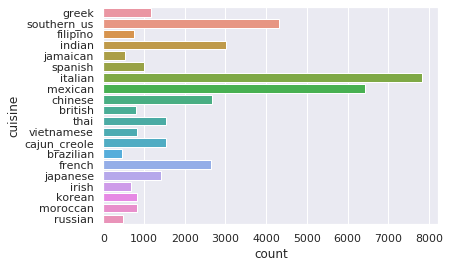

In [9]:
# Plotting the count plot to visulize the distribution of data
sb.countplot(y='cuisine',data=raw_data_train_df)

<h2>Data preparation: </h2> 
<br>Cleaning the data and normalizing all the text by converting it to lowercase

In [10]:
def text_prepare(ingredient):
    
    #Compilation of all the special characters
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    
    #Replacing the character
    ingredient = re.sub(REPLACE_BY_SPACE_RE,' ',ingredient)
    
    #Converting the text to lowercase
    ingredient = ingredient.lower()
    
    ingredient = ingredient.strip()
    ingredient = ' '.join([word for word in ingredient.split(" ")])
    
    return ingredient
    print("\nClass labels with average number of samples:\n-------------\n")

def loader(ingredient_list):    
    return ' '.join([text_prepare(ingredient) for ingredient in ingredient_list])
    

In [11]:
raw_data_train_df["ingredients"] = raw_data_train_df['ingredients'].apply(loader)

In [12]:
print(raw_data_train_df["ingredients"][1])
print("\n", raw_data_train_df["cuisine"][1])

plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil

 southern_us


In [13]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

#Encoding the cuisine
LabelEncd = LabelEncoder()
LabelEncd.fit(raw_data_train_df['cuisine'].values)

vec2tag = dict()
for i,labels in enumerate(list(LabelEncd.classes_)):
    vec2tag.update({i:labels})
vec2tag.values()

dict_values(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese'])

In [14]:
train_ingrd = raw_data_train_df['ingredients'].values

labels_enc = LabelEncd.transform(raw_data_train_df["cuisine"].values)
labels = to_categorical(labels_enc)
print("Labels dimension= ", labels.shape)
labels

Labels dimension=  (39774, 20)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
#We are using the keras's Tokenizer to tokenize all the words 
#in the ingredients column.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_ingrd)
vocabularySize = len(tokenizer.word_index) + 1

word_index = tokenizer.word_index
encoded_train_text = tokenizer.texts_to_sequences(train_ingrd)

print("Vocabulary Size= ",vocabularySize)

Vocabulary Size=  3065


In [16]:
# We pad the vectors to normalize the length of the sentence.
max_length = 40
padded_train_docs = pad_sequences(encoded_train_text, maxlen=max_length, padding='post')
print(len(padded_train_docs))

#Creating a dictionary for lookup after prediction
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

39774


---

<h3>GloVe: Global Vectors for Word Representation</h3>
<p>GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.<p>

For further reference: <a href="https://nlp.stanford.edu/projects/glove/">https://nlp.stanford.edu/projects/glove/</a>

**Usage:**
<br>We use glove to represent the words as a vector. The model that we chose is a glove.6B.100d which is trained on 6-Billion words and each word is represented by a 100-dimensional vector.

---

In [17]:
# Loading the glove model.

embeddings_index = dict()
f = open('glove_embedding/glove.6B.100d.txt') #glove.6B.100d.txt
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [18]:
#Creating a vocabulary list and writing it into a csv file

vocab = pd.DataFrame.from_dict(tokenizer.word_index,orient="index")
vocab.drop([0],axis=1).reset_index().rename(columns={"index":"word"}).to_csv("vocab.csv",index=False)

**NOTE:**
<br>Create a weight matrix for words in training text where we look up the vector value for the particular word on the **glove embedding**.


In [19]:

embedding_matrix = np.zeros((vocabularySize, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(3065, 100)


---

<h2>Machine Learning and New concepts</h2>

---

**Note:**
This function creates the model by instanciating the layers of the neural network and then we compile the model with the loss function and optimizer.

<h3><b><u>Neural network Architecture:</u></b></h3>

---
<u>Layer 1:</u>
```python
tf.keras.layers.Embedding 
```
1st layer to get the word embedding as input to the neural network

---
<u>Layer 2:</u>
```python
tf.keras.layers.Conv1D
```
The convolutional layer reduces the size of the inputs by performing convolutional operation on the input data.

---
<u>Layer 3:</u>
```python
tf.keras.layers.MaxPooling1D
```
The MaxPooling reduces the size of the input data from layer 2 to half its original size.

---
<u>Layer 4:</u>
```python
tf.keras.layers.Flatten
```
Flattens the data into a vector

---
<u>Layer 5:</u>
```python
tf.keras.layers.Dense
```
Dense is a fully connected layer with 250 neurons with a activation function of relu. 

---
<u>Layer 6:</u>
```python
tf.keras.layers.Dense
```
This is the output layer with number of output neurons equal to the number of classes. 

---

In [20]:

def model():
    model = tf.keras.models.Sequential([
            Embedding(vocabularySize, 100, weights=[embedding_matrix], 
                      input_length=40, trainable=False),
            Conv1D(filters=100,kernel_size=3, padding='same', 
                   activation='relu'),
            MaxPooling1D(pool_size=2),
            Flatten(),
            Dense(250, activation='relu'),
            Dense(LabelEncd.classes_.size, activation='sigmoid')
            ])
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                  metrics=['acc'])
    model.summary()
    return model

In [21]:
model = model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 100)           306500    
_________________________________________________________________
conv1d (Conv1D)              (None, 40, 100)           30100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 20, 100)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               500250    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                5020      
Total params: 841,870
Trainable params: 535,370
Non-trainable params: 306,500
____________________________________________

<b>NOTE:</b>

Since there is no testing data provided, we validated our model using **K-Fold cross validation method** and averaged the accuracy score.

For further reference: <a href="https://machinelearningmastery.com/k-fold-cross-validation/">https://machinelearningmastery.com/k-fold-cross-validation/</a>

In [22]:

kfold = KFold(5, shuffle=True, random_state=42)
CrossValidationScores = []

for train, test in kfold.split(padded_train_docs, labels):
    model.fit(padded_train_docs[train], labels[train],epochs=5)
    scores = model.evaluate(padded_train_docs[test], labels[test])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("------------------------------------------------------------------------------------------------")
    CrossValidationScores.append(scores[1]*100)
print("\nAccuracy:%.2f%% (+/- %.2f%%)" % (np.mean(CrossValidationScores), 
                               np.std(CrossValidationScores)))

Epoch 1/5
31819/31819 [==============================] - 9s 271us/sample - loss: 0.1454 - acc: 0.9561
Epoch 2/5
31819/31819 [==============================] - 7s 217us/sample - loss: 0.1024 - acc: 0.9660
Epoch 3/5
31819/31819 [==============================] - 7s 231us/sample - loss: 0.0879 - acc: 0.9702
Epoch 4/5
31819/31819 [==============================] - 8s 243us/sample - loss: 0.0771 - acc: 0.9735
Epoch 5/5
7955/7955 [==============================] - 1s 75us/sample - loss: 0.0803 - acc: 0.9724
acc: 97.24%
------------------------------------------------------------------------------------------------
Epoch 1/5
31819/31819 [==============================] - 6s 197us/sample - loss: 0.0656 - acc: 0.9774
Epoch 2/5
31819/31819 [==============================] - 7s 211us/sample - loss: 0.0579 - acc: 0.9799
Epoch 3/5
31819/31819 [==============================] - 7s 210us/sample - loss: 0.0513 - acc: 0.9823
Epoch 4/5
31819/31819 [==============================] - 7s 220us/sample - los

---

<h2>Testing the model with user inputs</h2>

---

1. Cleaning the given string. 
```python
v = text_prepare(string)
```

2. Converting the cleaned text ot sequences.
```python
EnSeq = tokenizer.texts_to_sequences([v])
```

3. Since our model's input size is of (x, 40) (where x is number of samples), we pad the sequence to length of 40.
```python
padd_seq = pad_sequences(EnSeq, maxlen=40, padding='post')
```

4. Using the trained model to predict.
```python
pred = model.predict(padd_seq)
```

5. We get the most recurring class among the list of words.

```python
tpred = [LabelEncd.classes_[np.argmax(prediction)] for prediction in pred]

```

In [24]:
def pred(string):
    cleanedText = text_prepare(string)
    EnSeq = tokenizer.texts_to_sequences([cleanedText])
    padd_seq = pad_sequences(EnSeq, maxlen=40, padding='post')
    print("Shape of the padded seuqence= ", padd_seq.shape)
    pred = model.predict(padd_seq)
    tpred = [LabelEncd.classes_[np.argmax(prediction)] for prediction in pred]
    return tpred

<font size="3"> **Note:** 'exit' is escape keyword</font>

In [ ]:
string = ''
while string!='exit':
    string = str(input("Enter the reciepe: "))
    if string != 'exit' and string !="" and string!=" ":
        print(pred(string))
    else:
        pass
    if string == "exit":
        print("\n[0]Exiting...")

Enter the reciepe: masala
Shape of the padded seuqence=  (1, 40)
['indian']
Enter the reciepe: pasta
Shape of the padded seuqence=  (1, 40)
['italian']
Enter the reciepe: black bean
Shape of the padded seuqence=  (1, 40)
['russian']
Enter the reciepe: apple
Shape of the padded seuqence=  (1, 40)
['mexican']


---

<h2>Writing out the meta data for further visulaization using tensorflow projector</h2>

In [30]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in tqdm(range(1, vocabularySize)):
  word = reverse_word_index[word_num]
  embeddings = embedding_matrix[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    
out_v.close()
out_m.close()

100%|██████████| 3064/3064 [00:00<00:00, 11535.02it/s]


---

<h2>Visualizing the word embeddings</h2>

We make use of the tensorflow projector to visualize the words in the 3D space.

Reference: <a href="https://projector.tensorflow.org/">https://projector.tensorflow.org/</a>
<br>
**NOTE:** The Vector TSV file and the Meta TSV File 

<img src="Images/pizza.png">
<br>
<img src="Images/pasta.png">
<br>
<img src="Images/naan.png">